In [2]:
import pandas as pd
tabela= pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


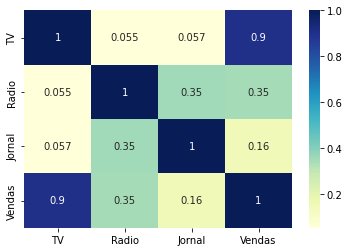

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
#criar o gráfico com seaborn
sns.heatmap(tabela.corr(), cmap="YlGnBu", annot= True)
#exibe o grafico com o matplot
plt.show()

In [4]:
# definir dados de treino e teste para a IA
from sklearn.model_selection import train_test_split
y= tabela['Vendas']
x= tabela.drop('Vendas', axis=1)
x_treino, x_teste, y_treino, y_teste= train_test_split(x,y, test_size=0.3)

In [5]:
#Começando a criar a IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#criar os modelos
modelo_regressaolinear= LinearRegression()
modelo_arvoredecisao= RandomForestRegressor()
#treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [6]:
#teste da IA
from sklearn import metrics
previsao_regrlin= modelo_regressaolinear.predict(x_teste)
previsao_arvdec= modelo_arvoredecisao.predict(x_teste)

print(metrics.r2_score(y_teste, previsao_regrlin))
print(metrics.r2_score(y_teste, previsao_arvdec))

0.9254786260344111
0.9384620105132598


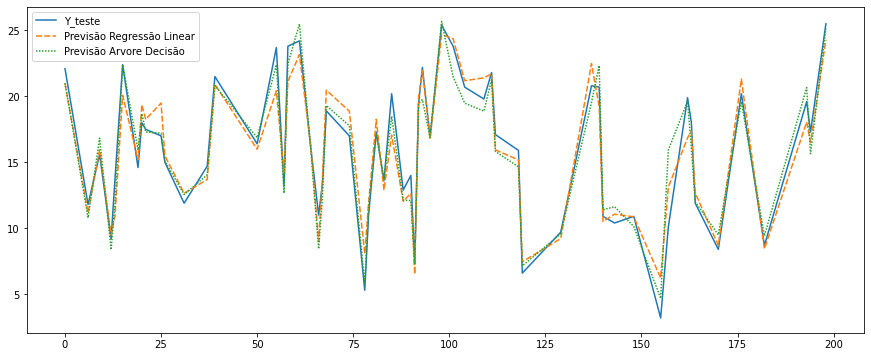

In [7]:
#Arvore da decisão é o melhor modelo
tabela_auxiliar= pd.DataFrame()
tabela_auxiliar['Y_teste']= y_teste
tabela_auxiliar['Previsão Regressão Linear']= previsao_regrlin
tabela_auxiliar['Previsão Arvore Decisão']= previsao_arvdec
plt.figure(figsize= (15,6))
sns.lineplot(data= tabela_auxiliar)
plt.show()

In [8]:
#nova previsão
nova_tabela= pd.read_csv('novos.csv')
display(nova_tabela)
previsão= modelo_arvoredecisao.predict(nova_tabela)
print(previsão)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.382  9.269 21.412]
